In [1]:
from visualization import cuGraph
from config import DATA_DIR

KN = cuGraph(outdir=DATA_DIR, graph_type='page', verbose=1)

Graph loaded from data//knowledge_graph/page_knowledge_graph.json


In [2]:
KN.nodes_df

,node
0,Totto_Land_Grand_Fleet
1,Eikon
2,Foxy_Pirates
3,Billower_Bike
4,Lonz
...,...
2488,Bounties/Gallery
2489,Eisen_Whip
2490,Same-kiri_Bocho
2491,Little_Gerais


In [3]:
KN.edges_df

,src,dst,label
0,Totto_Land_Grand_Fleet,Queen_Mama_Chanter,Queen Mama Chanter
1,Totto_Land_Grand_Fleet,Homies,homie
2,Totto_Land_Grand_Fleet,Straw_Hat_Pirates,Straw Hat Pirates
3,Totto_Land_Grand_Fleet,Totto_Land,Pawn Soldiers
4,Totto_Land_Grand_Fleet,Charlotte_Perospero,Perospero
...,...,...,...
63322,Jaki,Monkey_D._Luffy,Monkey D. Luffy
63323,Jaki,Roronoa_Zoro,Roronoa Zoro
63324,Bruiser_Axe,Axe,battle axe
63325,Bruiser_Axe,Little_Garden,Little Garden


In [4]:
KN.pagerank()

/home/achraf/miniconda3/envs/rapids-25.04/lib/python3.12/site-packages/cugraph/link_analysis/pagerank.py:232: UserWarning: Pagerank expects the 'store_transposed' flag to be set to 'True' for optimal performance during the graph creation
  warnings.warn(warning_msg, UserWarning)


,pagerank,vertex
1613,0.010568,Monkey_D._Luffy
1614,0.009230,Straw_Hat_Pirates
1615,0.005661,Marines
1616,0.004930,Sanji
1617,0.004698,Roronoa_Zoro
...,...,...
1074,0.000067,Kairo_Kureyo
1493,0.000067,Togare
1085,0.000067,Stefan
1087,0.000067,Nokotti


In [5]:
KN.betweenness_centrality()

,betweenness_centrality,vertex
1664,0.144864,Monkey_D._Luffy
1665,0.109856,Straw_Hat_Pirates
1666,0.038043,Marines
1669,0.030883,World_Government
1667,0.027763,Sanji
...,...,...
2485,0.000000,Saikoro
2486,0.000000,Ginnosuke
2487,0.000000,Ayes%C3%A9_Mar
2489,0.000000,Oide


In [6]:
KN.edge_betweenness_centrality()

,src,dst,betweenness_centrality
5419,Makko,Straw_Hat_Pirates,0.004301
30272,Mornin,Usopp,0.004301
41236,Monkey_D._Luffy,Mussel_Pirates,0.004301
48705,Hera_(Gladiator),Monkey_D._Luffy,0.004301
13073,Ahho_Desunen_IX,Gray_Terminal,0.004300
...,...,...,...
50508,Albatross_Delivery,Small_Bird_Delivery,0.000000
51425,Footbianco,Ottoland,0.000000
52251,Charlotte_Basans,Charlotte_Saint-Marc,0.000000
52966,Macro_(Automaton),Spacey,0.000000


In [7]:
KN.detect_communities()

In [8]:
KN.edges_df

,src,dst,label,betweenness_centrality
0,Tibany,Emporio_Ivankov,Emporio Ivankov,0.000000
1,Tibany,Pirates_Festival,Pirates Festival,0.000000
2,Tibany,Nami,Nami,0.000000
3,Tibany,Caroline,Caroline,0.000000
4,Tibany,Promise_Land,Promise Land,0.000000
...,...,...,...,...
63322,Cocox,Nami,Nami,0.000061
63323,Cocox,Buggy,Buggy,0.000000
63324,Octopako,Headband_Catfish_Village,Catfish village,0.000000
63325,Spencer,Rocks_Pirates,Rocks Pirates,0.000000


In [9]:
KN.nodes_df

,node,pagerank,betweenness_centrality,partition
0,Vivre_Card,0.000819,3.876766e-04,7
1,Boin_Archipelago,0.000243,3.181603e-05,6
2,Hawkman,0.000156,3.224792e-06,8
3,Pacifista,0.001573,1.786516e-03,2
4,Mash,0.000131,6.903582e-07,3
...,...,...,...,...
2488,Roronoa_Zoro/History/During_and_After_the_Time...,0.002390,6.126604e-03,8
2489,Battle_Frankies/BF-36,0.000452,1.499889e-04,5
2490,Sweet_Pea,0.000222,1.043542e-05,1
2491,Raccoon,0.000124,1.048913e-06,1


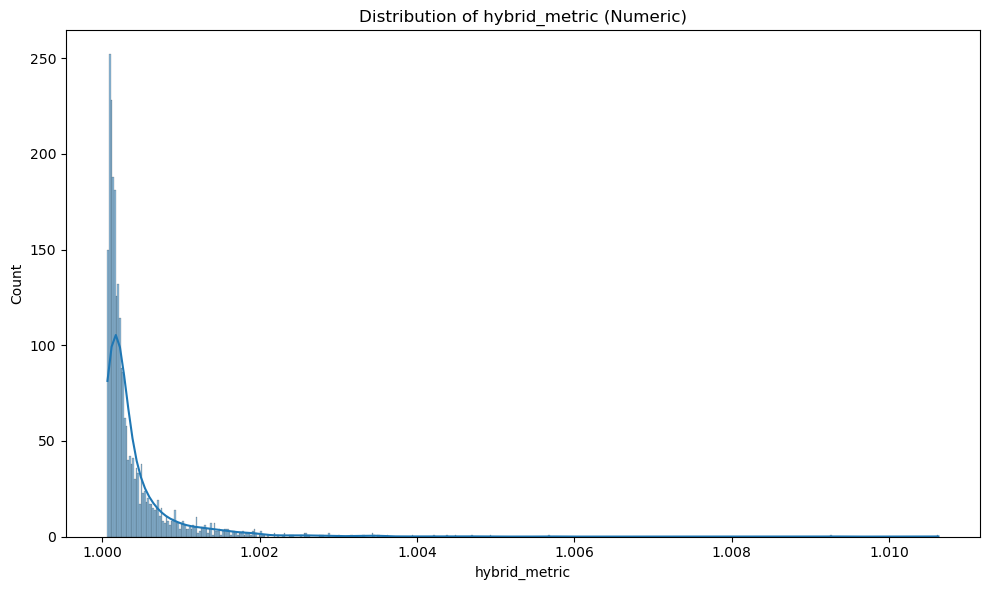

In [10]:
import numpy as np
def hybrid_score(pagerank): return np.exp(pagerank)
KN.plot_node_attribute_distribution(hybrid_attrs=['pagerank'], hybrid_func= hybrid_score, bins=500)

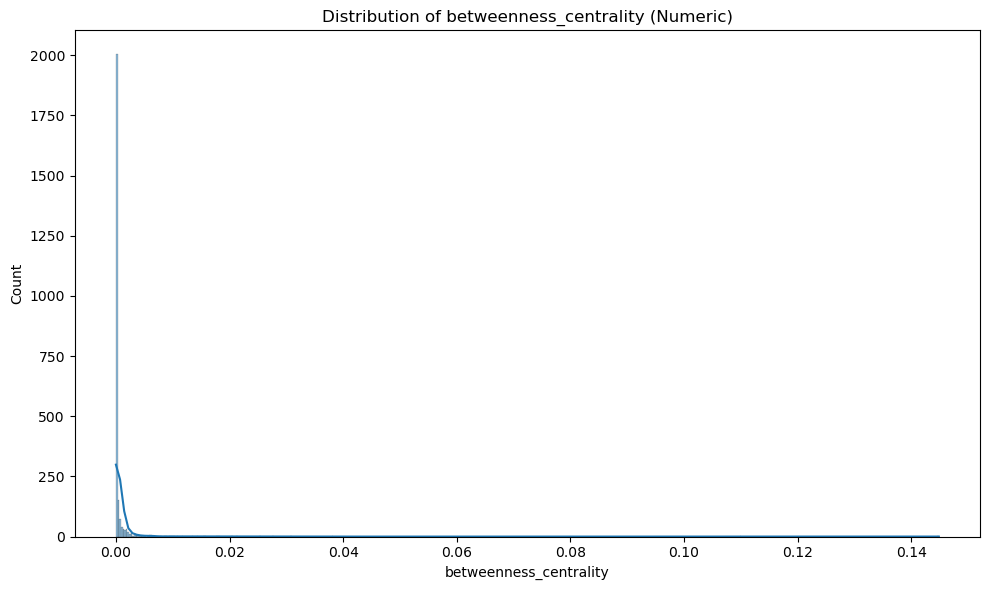

In [11]:
KN.plot_node_attribute_distribution('betweenness_centrality', bins=500)

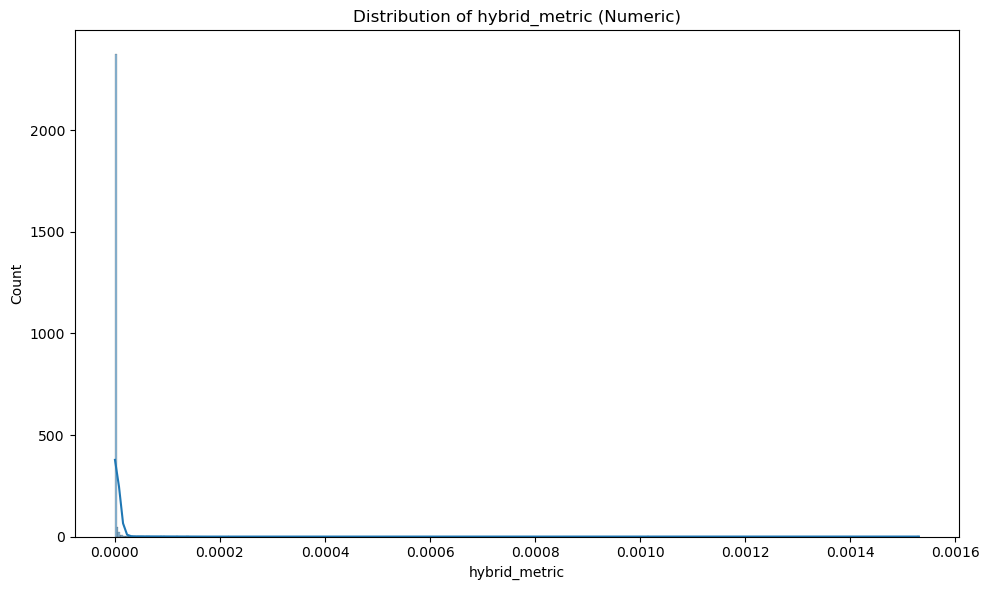

In [12]:
def hybrid_score(pagerank, bc): return pagerank * bc
KN.plot_node_attribute_distribution(hybrid_attrs=['pagerank', 'betweenness_centrality'], hybrid_func= hybrid_score, bins=500)

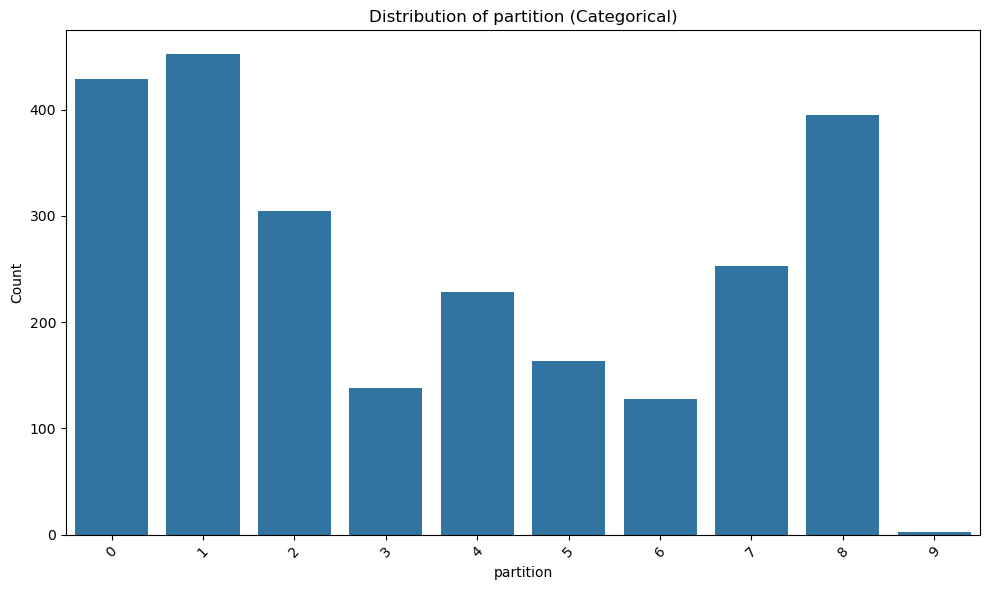

In [13]:
KN.plot_node_attribute_distribution(attr='partition')

In [14]:
# Top 10% PageRank nodes
KN.filter_nodes(by="pagerank", top_pct=0.1, inplace=False)

,node,pagerank,betweenness_centrality,partition,hybrid_metric
0,Monkey_D._Luffy,0.010568,0.144864,1,1.530990e-03
1,Straw_Hat_Pirates,0.009230,0.109856,0,1.013977e-03
2,Marines,0.005661,0.038043,1,2.153416e-04
3,Sanji,0.004930,0.027763,7,1.368705e-04
4,Roronoa_Zoro,0.004698,0.025349,8,1.191020e-04
...,...,...,...,...,...
244,Hajrudin,0.000920,0.000605,4,5.570404e-07
245,Amazon_Lily,0.000919,0.000762,1,6.997529e-07
246,Neptune,0.000919,0.001019,3,9.356982e-07
247,Seraphim,0.000916,0.000434,2,3.972347e-07


In [15]:
# Use a hybrid metric
def hybrid_score(pagerank, bc): return pagerank * bc
KN.filter_nodes(hybrid_attrs=['pagerank', 'betweenness_centrality'], hybrid_func= hybrid_score , top_pct=0.9, inplace=False)


,node,pagerank,betweenness_centrality,partition,hybrid_metric
0,Monkey_D._Luffy,0.010568,1.448645e-01,1,1.530990e-03
1,Straw_Hat_Pirates,0.009230,1.098563e-01,0,1.013977e-03
2,Marines,0.005661,3.804253e-02,1,2.153416e-04
3,World_Government,0.004476,3.088333e-02,2,1.382326e-04
4,Sanji,0.004930,2.776333e-02,7,1.368705e-04
...,...,...,...,...,...
2238,Conquest_of_Four_Nations,0.000124,7.087907e-08,7,8.806802e-12
2239,Suzume,0.000095,9.237249e-08,5,8.767708e-12
2240,Warabide_Sword,0.000076,1.158425e-07,4,8.761616e-12
2241,Franken,0.000082,1.052632e-07,8,8.640258e-12


In [16]:
# Top 80% Edge Centrality nodes
top_nodes = KN.filter_edges(by="betweenness_centrality", top_pct=0.8, inplace=True)

In [17]:
KN.remove_dead_ends_and_orphans(recurse=True, inplace=True)

Removed 10048 edges...
Removed 1964 edges...
Removed 41 edges...
Total edges removed: 12053


In [18]:
KN.edges_df

,src,dst,label,betweenness_centrality
0,Ahho_Desunen_IX,Gray_Terminal,Gray Terminal,0.004300
1,Blakey,Straw_Hat_Pirates,Straw Hat Pirates,0.003082
2,Chiya,Religion,gods,0.003012
3,Backlight,Tony_Tony_Chopper,Tony Tony Chopper,0.002800
4,Kuzan,Vespa_Kingdom,Vespa Kingdom,0.002785
...,...,...,...,...
38603,Shooter,Devil_Fruit,Devil Fruit,0.000000
38604,Fish-Man_Jujutsu,Aladine,Aladine,0.000000
38605,Fish-Man_Jujutsu,Charlotte_Daifuku,Charlotte Daifuku,0.000000
38606,Fish-Man_Jujutsu,Charlotte_Katakuri,Charlotte Katakuri,0.000000


In [19]:
KN.nodes_df

,node,pagerank,betweenness_centrality,partition,hybrid_metric
0,Vivre_Card,0.000819,3.876766e-04,7,3.175582e-07
1,Boin_Archipelago,0.000243,3.181603e-05,6,7.731585e-09
2,Hawkman,0.000156,3.224792e-06,8,5.032918e-10
3,Pacifista,0.001573,1.786516e-03,2,2.810963e-06
4,Mash,0.000131,6.903582e-07,3,9.010846e-11
...,...,...,...,...,...
1906,Newspaper,0.001202,1.128286e-03,2,1.355928e-06
1907,Pirate_Apprentice,0.000437,7.332512e-05,1,3.205902e-08
1908,Battle_Frankies/BF-36,0.000452,1.499889e-04,5,6.779077e-08
1909,Sweet_Pea,0.000222,1.043542e-05,1,2.311817e-09


In [20]:
# Normalize edge betweenness to a [0,1] range for transparency
ebc_min = KN.edges_df['betweenness_centrality'].min()
ebc_max = KN.edges_df['betweenness_centrality'].max()
KN.edges_df['edge_transparency'] = 1.0 - (KN.edges_df['betweenness_centrality'] - ebc_min) / (ebc_max - ebc_min + 1e-9)

# Normalize pagerank for size (optional step if values are very small)
pr_min = KN.nodes_df['pagerank'].min()
pr_max = KN.nodes_df['pagerank'].max()
KN.nodes_df['node_size'] = 10 + 90 * (KN.nodes_df['pagerank'] - pr_min) / (pr_max - pr_min + 1e-9)  # Size in range [10, 100]

# Normalize node betweenness to a [0,1] range for transparency
bc_min = KN.nodes_df['betweenness_centrality'].min()
bc_max = KN.nodes_df['betweenness_centrality'].max()
KN.nodes_df['node_weight'] = (KN.nodes_df['betweenness_centrality'] - bc_min) / (bc_max - bc_min + 1e-9)

In [21]:
from graphistry.plugins.igraph import layout_algs as igraph_layouts
from graphistry.plugins.cugraph import layout_algs as cugraph_layouts

{
    'igraph_layout_algs': ', '.join(igraph_layouts),
    'cugraph_layout_algs': ', '.join(cugraph_layouts)
}

{'igraph_layout_algs': 'auto, automatic, bipartite, circle, circular, dh, davidson_harel, drl, drl_3d, fr, fruchterman_reingold, fr_3d, fr3d, fruchterman_reingold_3d, grid, grid_3d, graphopt, kk, kamada_kawai, kk_3d, kk3d, kamada_kawai_3d, lgl, large, large_graph, mds, random, random_3d, rt, tree, reingold_tilford, rt_circular, reingold_tilford_circular, sphere, spherical, circle_3d, circular_3d, star, sugiyama',
 'cugraph_layout_algs': 'force_atlas2'}

In [ ]:
import graphistry

graphistry.register( 
        api=3,
        personal_key_id="personal_key_id",
        personal_key_secret="personal_key_secret"
    )

# Build graph
g = graphistry.edges(KN.edges_df, 'src', 'dst') \
             .bind(edge_title='label') \
             .bind(edge_opacity='edge_transparency') \
             .nodes(KN.nodes_df, 'node') \
             .bind(point_color='partition') \
             .bind(point_size='node_size') \
             .bind(point_weight='node_weight') \
             .bind(point_title='node') \
             .modularity_weighted_layout('partition')
            
# Launch the visualization
g.plot()

In [ ]:
import graphistry

graphistry.register( 
        api=3,
        personal_key_id="personal_key_id",
        personal_key_secret="personal_key_secret"
    )


# Build graph
g = graphistry.edges(KN.edges_df, 'src', 'dst') \
             .bind(edge_title='label') \
             .bind(edge_opacity='edge_transparency') \
             .nodes(KN.nodes_df, 'node') \
             .bind(point_color='partition') \
             .bind(point_weight='node_size') \
             .bind(point_title='node') \
             .group_in_a_box_layout(
                partition_key='partition',
                layout_alg='force_atlas2',
                layout_params={
                    'lin_log_mode': True
                }
            )
            
# Launch the visualization
g.plot()


/home/achraf/miniconda3/envs/rapids-25.04/lib/python3.12/site-packages/cugraph/structure/symmetrize.py:260: FutureWarning: This method is deprecated and will no longer be supported. The symmetrization of the edges are only supported by setting the 'symmetrize' flag to 'True'
  warnings.warn(
/home/achraf/miniconda3/envs/rapids-25.04/lib/python3.12/site-packages/cugraph/structure/symmetrize.py:92: FutureWarning: Multi is deprecated and the removal of multi edges will no longer be supported from 'symmetrize'. Multi edges will be removed upon creation of graph instance.
  warnings.warn(
